In [15]:
from matplotlib.dates import DateFormatter

In [1]:
import pandas as pd
import datetime
import numpy as np
import os
import matplotlib.pyplot as plt
import math
import sys
import seaborn as sns
sys.path.insert(1, '../')
from API.IdealDataInterface import IdealDataInterface
from API.IdealMetadataInterface import IdealMetadataInterface

In [2]:
meta_folder_path = 'D:\\MInf_data\\metadata'
meta_ideal = IdealMetadataInterface(meta_folder_path)

In [3]:
homes = meta_ideal._metafile('home')['home']
rooms = meta_ideal._metafile('room')['room']
appliances = meta_ideal._metafile('appliance')['appliance']
sensorboxes = meta_ideal._metafile('sensorbox')['sensorbox']
sensors = meta_ideal._metafile('sensor')['sensor']
people = meta_ideal._metafile('person')['person']
locations = meta_ideal._metafile('location')['location']
weatherfeeds = meta_ideal._metafile('weatherfeed')['weatherfeed']

In [18]:
feedSeries = weatherfeeds[weatherfeeds.locationid == 'Edinburgh'][weatherfeeds.weather_type=='temperature'].get('feedid').item()
print(feedSeries)

0    1
Name: feedid, dtype: int64


C:\miniconda3\envs\pdiot\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
df_flats = homes[homes.hometype=='flat']
df_homes = homes[homes.hometype=='house_or_bungalow']

In [ ]:
print(df_flats.build_era.value_counts())

In [ ]:
print(df_homes.build_era.value_counts())
print(df_homes.shape)

In [ ]:
print(df_homes.residents.value_counts())

In [ ]:
r1 = df_flats[df_flats.build_era=='Before 1850'].residents.value_counts()
r2 = df_flats[df_flats.build_era=='1850-1899'].residents.value_counts()
r3 = df_flats[df_flats.build_era=='1900-1918'].residents.value_counts()
r4 = df_flats[df_flats.build_era=='1919-1930'].residents.value_counts()
r5 = df_flats[df_flats.build_era=='1931-1944'].residents.value_counts()
r6 = df_flats[df_flats.build_era=='1945-1964'].residents.value_counts()
r7 = df_flats[df_flats.build_era=='1965-1980'].residents.value_counts()
r8 = df_flats[df_flats.build_era=='1981-1990'].residents.value_counts()
r9 = df_flats[df_flats.build_era=='1991-1995'].residents.value_counts()
r10 = df_flats[df_flats.build_era=='1996-2001'].residents.value_counts()
r11 = df_flats[df_flats.build_era=='2002 or later'].residents.value_counts()

r_d = r1.add(r2, fill_value=0)
r_a = r3
for r in [r4,r5,r6,r7,r8,r9,r10,r11]:
    r_a = r_a.add(r, fill_value=0)

In [ ]:
print(r_d)
print(r_a)

In [ ]:
r11 = df_homes[df_homes.build_era=='Before 1850'].residents.value_counts()
r21 = df_homes[df_homes.build_era=='1850-1899'].residents.value_counts()
r31 = df_homes[df_homes.build_era=='1900-1918'].residents.value_counts()
r41 = df_homes[df_homes.build_era=='1919-1930'].residents.value_counts()
r51 = df_homes[df_homes.build_era=='1931-1944'].residents.value_counts()
r61 = df_homes[df_homes.build_era=='1945-1964'].residents.value_counts()
r71 = df_homes[df_homes.build_era=='1965-1980'].residents.value_counts()
r81 = df_homes[df_homes.build_era=='1981-1990'].residents.value_counts()
r91 = df_homes[df_homes.build_era=='1991-1995'].residents.value_counts()
r101 = df_homes[df_homes.build_era=='1996-2001'].residents.value_counts()
r111 = df_homes[df_homes.build_era=='2002 or later'].residents.value_counts()

r_dd = r11
for r in [r21,r31,r41,r51,r61]:
    r_dd = r_dd.add(r,fill_value=0)
r_aa = r71
for r in [r81,r91,r101,r111]:
    r_aa = r_aa.add(r, fill_value=0)

In [ ]:
print(r_dd)
print(r_aa)

In [ ]:
print(appliances)

In [ ]:
print(appliances.appliancetype.value_counts())

In [ ]:
print(appliances.appliancesubtype.value_counts())

In [3]:
folder_path = 'D:\\MInf_data\\sensordata'
ideal = IdealDataInterface(folder_path)

Found entries for 1592 sensor readings.


In [4]:
home_data = ideal.get(homeid = 63, category = 'electric-mains')

In [ ]:
print(home_data)

In [5]:
ds = home_data[0]['readings']

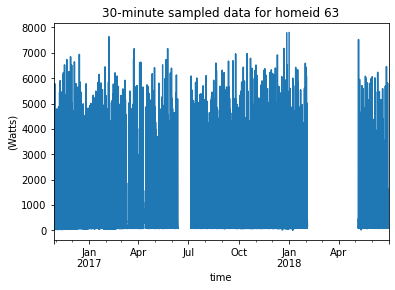

In [25]:
dss = ds.resample('30T').mean()
dss.plot()
plt.ylabel('(Watts)')
plt.title('30-minute sampled data for homeid 63')
plt.savefig('../sample_data/homeid63allData.pdf')

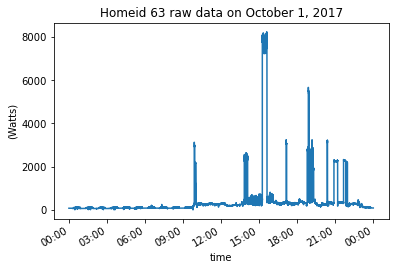

In [23]:
ax = ds['2017-10-01'].plot()
hh_mm = DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hh_mm)
plt.ylabel('(Watts)')
plt.title("Homeid 63 raw data on October 1, 2017")
plt.savefig('../sample_data/homeid63Oct1.pdf')
#plt.xticks([x.strftime('%HH:%MM') for x in xticks])

In [ ]:
ds1 = dss.resample('30T').sum()
ds2 = dss.resample('30T').count()

In [ ]:
print(ds1)

In [ ]:
print(ds2)

In [ ]:
#ds1.loc[ds2<1500] = np.nan
ds1.plot()

In [ ]:


# When you resample, you get representation from your old series and are able to interpolate.
# What you want to do is to create an index that is the union of the old index with a new index. 
# Then interpolate and reindex with a new index.

oidx = ds.index
nidx = pd.date_range(oidx.min().round('30min'), oidx.max().round('30min'), freq='30min')
res = ds.reindex(oidx.union(nidx)).interpolate('index', limit=10).loc[nidx]

In [ ]:
ds.plot()

In [ ]:
res.plot()

In [ ]:
print(res)

In [ ]:
df = ds1.to_frame()

print(df['2016-12-31':'2017-01-01'])

In [ ]:
home_data2 = ideal.get(homeid = 67, category = 'electric-mains')
ds2 = home_data2[0]['readings']
ds21 = ds2.interpolate('nearest').resample('30T').mean()

In [ ]:
df2 = ds21.to_frame()
print(df2['2016-12-31':'2017-01-01'])

In [ ]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

In [ ]:
df['electric-combined'].isna().sum()

In [ ]:
df['electric-combined_0'].plot()

In [ ]:
df2['electric-combined_1'].plot()

In [ ]:
dfs = (df, df2)

# rename column for later plotting
for i,df3 in zip(range(2),dfs):
    df3.rename(columns={'electric-combined':f'electric-combined_{i}'}, inplace=True)

# concatenate the dataframes with common time index
#pd.merge(df, df2, left_on='timest', right_on='timestamp', how='outer')
df_all = pd.concat([df, df2], axis=1)

df_all['avg'] = df_all.mean(axis=1)
df_all['std'] = df_all.std(axis=1)
df_all['min_val'] = df_all['avg'] - df_all['std']
df_all['max_val'] = df_all['avg'] + df_all['std']
print(df_all['2016-12-30'])


In [ ]:
# plot graphs

plt.plot(df_all.index, df_all.avg, c='purple')
plt.fill_between(df_all.index, df_all.min_val, df_all.max_val, color='blue', alpha=.2)
plt.show()

In [34]:
def createDF(home_list):
    df_list = []
    for idx,home_id in enumerate(home_list):
        home_data = ideal.get(homeid = home_id, category = 'electric-mains')
        ds = home_data[0]['readings']
        df_resample = ds.resample('30T').mean()
        df_count = ds.resample('30T').count()
        df_resample.loc[df_count < 900] = np.nan
        df = df_resample.to_frame()
        name = 'electric-combined_'+str(idx)
        df.rename(columns={'electric-combined':name})
        df_list.append(df)
    df_all = pd.concat(df_list, axis=1)
    return df_all

In [45]:
# calculate 95% confidence interval
def calculate95ConfInt(df_all):
    df = pd.DataFrame()
    df['avg'] = df_all.mean(axis=1)
    df['std'] = df_all.std(axis=1)
    df['avg'].interpolate("linear", order=3, inplace=True)
    df['std'].interpolate("nearest", inplace=True)
    df['min_val'] = np.where((df['avg'] - df['std']) < 0, 0,(df['avg'] - df['std']))
    df['max_val'] = df['avg'] + df['std']
    return df


In [40]:
def plotAvgwithConfInt(df, htype, nrppl, bldera):
    #sns.lineplot(x = df.index, y = "avg", data = df)
    plt.plot(df.index, df.avg, c='purple', label = "average consumption")
    plt.fill_between(df.index, df.min_val, df.max_val, color='blue', alpha=.2, label = "Standard Deviation")
    title = "Avg consumption for " + htype + "s of " + nrppl + ", built " + bldera
    plt.title(title)
    plt.xlabel('time')
    plt.ylabel('average electricity consumption')
    xticks = pd.date_range(min(df.index), max(df.index), periods = 5)
    plt.xticks([x.strftime('%Y-%m-%d') for x in xticks])
    filename = htype + "_" + nrppl + "_" + bldera + ".png"
    plt.legend()
    plt.savefig('../../../imgs/' + filename)
    plt.show()
    
    

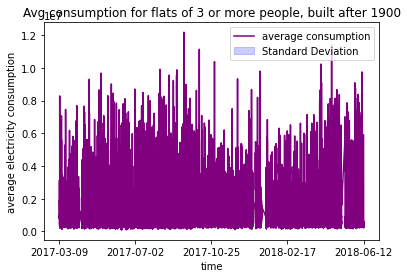

In [56]:
home_list = [84, 102, 147, 148, 188, 190, 214, 212, 244, 252, 276, 284, 301, 304, 309, 322]
df_all = createDF(home_list)
df = calculate95ConfInt(df_all)
plotAvgwithConfInt(df, "flat", "3 or more people", "after 1900")

<AxesSubplot:xlabel='time'>

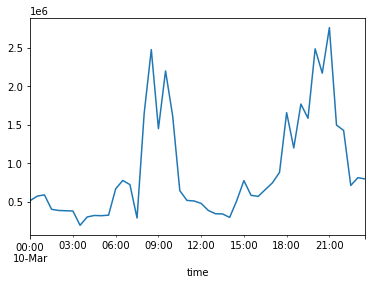

In [58]:
df['2017-03-10':'2017-03-10']['avg'].plot()

In [49]:
# flat, 2 or less ppl, before 1900
home_list1 = [62, 72, 74, 83, 105, 114, 116, 117, 119, 125, 136, 135, 144, 145, 150, 153, 156, 158, 160, 159, 167, 179, 205, 208, 215, 225, 227, 234, 249, 248, 250, 251, 253, 256, 267, 269, 275, 278, 279, 286, 292, 294, 295, 310, 311, 328, 319, 313, 323, 320]
# flat, 2 or less ppl, after 1900
home_list2 = [47, 59, 67, 70, 75, 71, 77, 80, 91, 94, 100, 106, 118, 121, 128, 137, 141, 143, 149, 165, 157, 162, 189, 193, 194, 197, 213, 216, 221, 209, 226, 237, 239, 238, 241, 257, 258, 262, 272, 274, 285, 289, 288, 300, 302, 317, 321, 332]
# flat, 3 or more ppl, before 1900
home_list3 = [64, 73, 78, 76, 85, 93, 98, 97, 122, 123, 124, 139, 140, 180, 177, 182, 201, 218, 240, 255, 265, 280, 282, 287, 296, 334, 333]

# house, 2 or less ppl, before 1965
home_list4 = [61, 63, 65, 68, 81, 86, 82, 89, 120, 126, 151, 155, 161, 178, 183, 266, 259, 281, 283, 291, 298, 305, 308, 315]
# house, 2 or less ppl, after 1965
home_list5 = [88, 90, 101, 107, 169, 163, 175, 184, 186, 202, 203, 224, 231, 235, 260, 268, 277, 293, 303, 299, 329, 331]
# house, 3 or more ppl, before 1965
home_list6 = [92, 96, 99, 133, 134, 138, 146, 152, 154, 164, 166, 168, 174, 176, 185, 187, 192, 195, 199, 200, 206, 210, 211, 222, 229, 232, 230, 243, 245, 247, 261, 264, 263, 270, 273, 290, 306, 307, 326, 327, 330]
# house, 3 or more ppl, after 1965. house 223 has no electric-mains issued
home_list7 = [66, 69, 79, 109, 110, 115, 129, 113, 170, 173, 181, 191, 207, 233, 236, 242, 246, 254, 316, 318, 325, 335]

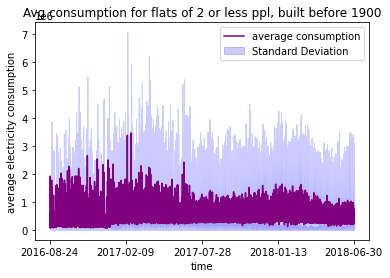

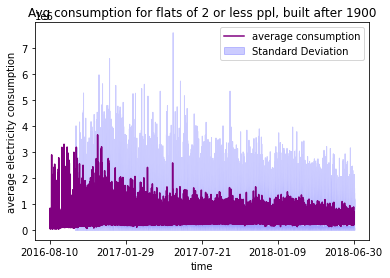

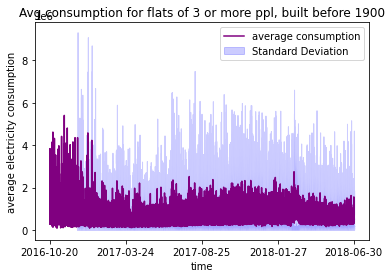

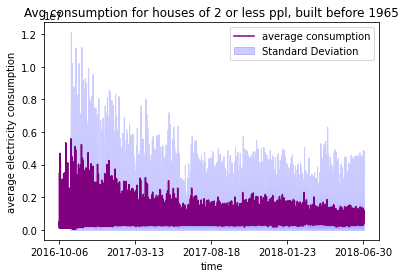

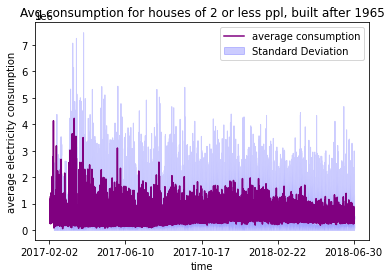

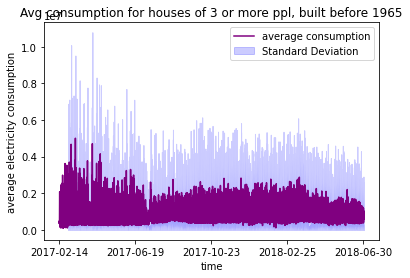

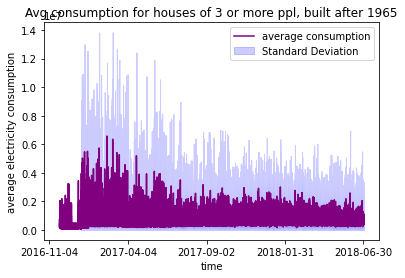

In [50]:
hl_list = [home_list1, home_list2, home_list3, home_list4, home_list5, home_list6, home_list7]
htypes = ['flat', 'flat', 'flat', 'house', 'house', 'house', 'house']
nrppls = ['2 or less ppl', '2 or less ppl', '3 or more ppl', '2 or less ppl', '2 or less ppl', '3 or more ppl', '3 or more ppl']
blderas = ['before 1900', 'after 1900', 'before 1900', 'before 1965', 'after 1965', 'before 1965', 'after 1965']

for i in range(len(hl_list)):
    df_all = createDF(hl_list[i])
    df = calculate95ConfInt(df_all)
    plotAvgwithConfInt(df, htypes[i], nrppls[i], blderas[i])

In [ ]:
# house 223 has no electric mains issued due to unreliable sensor readings due to properties of the house
home_list7 = [66, 69, 79, 109, 110, 115, 129, 113, 170, 173, 181, 191, 207, 233, 236, 242, 246, 254, 316, 318, 325, 335]
df_all = createDF(home_list7)
df = calculate95ConfInt(df_all)
plotAvgwithConfInt(df, "house", "3 or more ppl", "after 1965")